In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('../data/numeric_text_combined_state_response.csv')
pd.set_option('display.max_columns', None)

In [14]:
df.head()

protestnumber  protesterviolence  participants  accomodation  arrests  \
0              1                0.0          3000             0        0   
1              2                0.0          1000             0        0   
2              3                0.0           500             0        0   
3              4                1.0           300             1        0   
4              5                1.0           950             1        1   

   beatings  crowd dispersal  ignore  killings  shootings stateresponse  \
0         0                0       1         0          0        ignore   
1         0                0       1         0          0        ignore   
2         0                0       1         0          0        ignore   
3         0                0       0         0          0  accomodation   
4         0                1       0         0          0       arrests   

   stateresponse_violence  labor wage dispute  land farm issue  \
0                       0                   1                0   
1                       0                   0                0   
2                       0                   0                0   
3                       0                   0                1   
4                       1                   0                0   

   police brutality  political behavior, process  price increases, tax policy  \
0                 0                            1                            0   
1                 0                            1                            0   
2                 0                            1                            0   
3                 0                            0                            0   
4                 0                            1                            0   

   removal of politician  social restrictions  duration  country_Albania  \
0                      0                    0         0                0   
1                      0                    0         0                0   
2                      0                    0         0                0   
3                      0                    0        56                0   
4                      0                    0         1                0   

   country_Algeria  country_Angola  country_Argentina  country_Armenia  \
0                0               0                  0                0   
1                0               0                  0                0   
2                0               0                  0                0   
3                0               0                  0                0   
4                0               0                  0                0   

   country_Austria  country_Azerbaijan  country_Bahrain  country_Bangladesh  \
0                0                   0                0                   0   
1                0                   0                0                   0   
2                0                   0                0                   0   
3                0                   0                0                   0   
4                0                   0                0                   0   

   country_Belarus  country_Belgium  country_Benin  country_Bhutan  \
0                0                0              0               0   
1                0                0              0               0   
2                0                0              0               0   
3                0                0              0               0   
4                0                0              0               0   

   country_Bolivia  country_Bosnia  country_Botswana  country_Brazil  \
0                0               0                 0               0   
1                0               0                 0               0   
2                0               0                 0               0   
3                0               0                 0               0   
4                0               0                 0 

In [19]:
df.shape

(14474, 3221)

<AxesSubplot:ylabel='Frequency'>

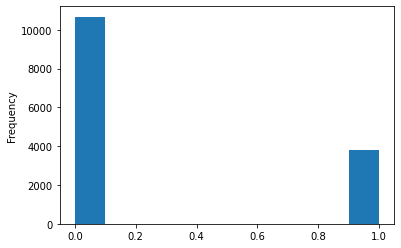

In [15]:
df['protesterviolence'].plot(kind = 'hist')

<AxesSubplot:>

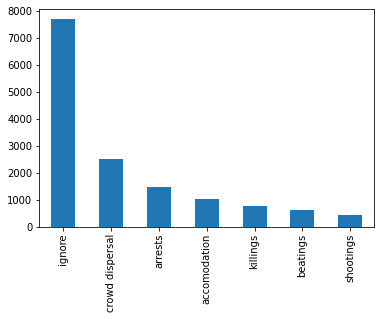

In [16]:
df['stateresponse'].value_counts().plot(kind = 'bar')

### Splitting into Protester Violence, No PV, State Response and NO State Response

In [47]:
no_pv = df[df['protesterviolence'] == 0]

In [36]:
pv = df[df['protesterviolence'] == 1]

In [38]:
df['st_weight'] = df['stateresponse'].map({'accomodation': 2, 'ignore': 1, 'crowd dispersal': 3,
                                                       'arrests': 4, 'beatings': 5, 'shootings': 6, 'killings': 7})

In [40]:
st = df[df['st_weight'] > 2]

In [55]:
no_st = df[df['st_weight'] < 2]

### Only Keep Columns from Count Vectorizer

In [33]:
note_count = df[df.columns[-3000:]]


In [34]:
note_count.head()

000  000 000  000 demonstrator  000 people  000 police  000 protester  \
0  0.000000      0.0               0.0         0.0         0.0            0.0   
1  0.000000      0.0               0.0         0.0         0.0            0.0   
2  0.058567      0.0               0.0         0.0         0.0            0.0   
3  0.000000      0.0               0.0         0.0         0.0            0.0   
4  0.000000      0.0               0.0         0.0         0.0            0.0   

   000 student  000 supporter  000 worker  000s  100  100 people  1000  \
0          0.0            0.0         0.0   0.0  0.0         0.0   0.0   
1          0.0            0.0         0.0   0.0  0.0         0.0   0.0   
2          0.0            0.0         0.0   0.0  0.0         0.0   0.0   
3          0.0            0.0         0.0   0.0  0.0         0.0   0.0   
4          0.0            0.0         0.0   0.0  0.0         0.0   0.0   

   100000  100000 people  120  150  15th  1989  1995  1st       200  \
0     0.0            0.0  0.0  0.0   0.0   0.0   0.0  0.0  0.000000   
1     0.0            0.0  0.0  0.0   0.0   0.0   0.0  0.0  0.000000   
2     0.0            0.0  0.0  0.0   0.0   0.0   0.0  0.0  0.000000   
3     0.0            0.0  0.0  0.0   0.0   0.0   0.0  0.0  0.064694   
4     0.0            0.0  0.0  0.0   0.0   0.0   0.0  0.0  0.000000   

   200 people  200000  2003  2009  2011  2011 ha  2012  2013  2014  2015  \
0         0.0     0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   
1         0.0     0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   
2         0.0     0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   
3         0.0     0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   
4         0.0     0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   

   2016  2017  250  300  300 people  350  400  406th  406th protest       500  \
0   0.0   0.0  0.0  0.0         0.0  0.0  0.0    0.0            0.0  0.000000   
1   0.0   0.0  0.0  0.0         0.0  0.0  0.0    0.0            0.0  0.000000   
2   0.0   0.0  0.0  0.0         0.0  0.0  0.0    0.0            0.0  0.191088   
3   0.0   0.0  0.0  0.0         0.0  0.0  0.0    0.0            0.0  0.000000   
4   0.0   0.0  0.0  0.0         0.0  0.0  0.0    0.0            0.0  0.000000   

   500 people  5th  600       700  800  abandoned  abdullah  ablaze  able  \
0         0.0  0.0  0.0  0.111533  0.0        0.0       0.0     0.0   0.0   
1         0.0  0.0  0.0  0.000000  0.0        0.0       0.0     0.0   0.0   
2         0.0  0.0  0.0  0.000000  0.0        0.0       0.0     0.0   0.0   
3         0.0  0.0  0.0  0.000000  0.0        0.0       0.0     0.0   0.0   
4         0.0  0.0  0.0  0.000000  0.0        0.0       0.0     0.0   0.0   

   abortion  abuja  abuse  academic  accept  access  accident  accommodation  \
0       0.0    0.0    0.0       0.0     0.0     0.0       0.0            0.0   
1       0.0    0.0    0.0       0.0     0.0     0.0       0.0            0.0   
2       0.0    0.0    0.0       0.0     0.0     0.0       0.0            0.0   
3       0.0    0.0    0.0       0.0     0.0     0.0       0.0            0.0   
4       0.0    0.0    0.0       0.0     0.0     0.0       0.0            0.0   

     accord  according  according local  according police  account  \
0  0.000000        0.0              0.0               0.0      0.0   
1  0.000000        0.0              0.0               0.0      0.0   
2  0.150024        0.0              0.0               0.0      0.0   
3  0.000000        0.0              0.0               0.0      0.0   
4  0.000000        0.0              0.0               0.0      0.0   

   accusation  accuse  accused  accusing  acronym  act  acting    action  \
0         0.0     0.0      0.0       0.0      0.0  0.0     0.0  0.000000   
1         0.0     0.0      0.0       0.0      0.0  0.0     0.0  0.000000   
2         0.0     0.0      0.0       0.0      0.0  0.0     0.0  0.000000   
3         0.0     0.0      0.0      

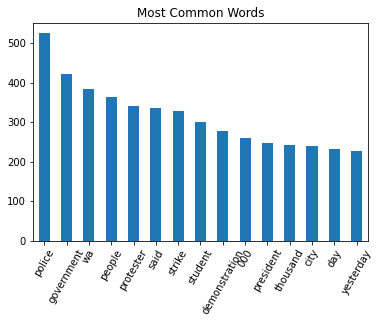

In [65]:
note_count.sum().sort_values(ascending = False).head(15).plot(kind = 'bar')
plt.title('Most Common Words')
plt.xticks(rotation = 60);

In [44]:
pv_note_count = pv[pv.columns[-3000:]]

In [53]:
no_pv_note_count = no_pv[no_pv.columns[-3000:3221]]

In [66]:
#making sure right words are kept
pv_note_count.head()

000  000 000  000 demonstrator  000 people  000 police  \
3   0.000000      0.0               0.0         0.0         0.0   
4   0.000000      0.0               0.0         0.0         0.0   
8   0.000000      0.0               0.0         0.0         0.0   
14  0.000000      0.0               0.0         0.0         0.0   
18  0.085798      0.0               0.0         0.0         0.0   

    000 protester  000 student  000 supporter  000 worker  000s       100  \
3        0.000000          0.0            0.0         0.0   0.0  0.000000   
4        0.000000          0.0            0.0         0.0   0.0  0.000000   
8        0.000000          0.0            0.0         0.0   0.0  0.000000   
14       0.000000          0.0            0.0         0.0   0.0  0.054374   
18       0.170818          0.0            0.0         0.0   0.0  0.000000   

    100 people  1000  100000  100000 people  120  150  15th  1989  1995  1st  \
3          0.0   0.0     0.0            0.0  0.0  0.0   0.0   0.0   0.0  0.0   
4          0.0   0.0     0.0            0.0  0.0  0.0   0.0   0.0   0.0  0.0   
8          0.0   0.0     0.0            0.0  0.0  0.0   0.0   0.0   0.0  0.0   
14         0.0   0.0     0.0            0.0  0.0  0.0   0.0   0.0   0.0  0.0   
18         0.0   0.0     0.0            0.0  0.0  0.0   0.0   0.0   0.0  0.0   

         200  200 people  200000  2003  2009  2011  2011 ha  2012  2013  2014  \
3   0.064694         0.0     0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   
4   0.000000         0.0     0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   
8   0.000000         0.0     0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   
14  0.000000         0.0     0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   
18  0.000000         0.0     0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   

    2015  2016  2017  250  300  300 people  350  400  406th  406th protest  \
3    0.0   0.0   0.0  0.0  0.0         0.0  0.0  0.0    0.0            0.0   
4    0.0   0.0   0.0  0.0  0.0         0.0  0.0  0.0    0.0            0.0   
8    0.0   0.0   0.0  0.0  0.0         0.0  0.0  0.0    0.0            0.0   
14   0.0   0.0   0.0  0.0  0.0         0.0  0.0  0.0    0.0            0.0   
18   0.0   0.0   0.0  0.0  0.0         0.0  0.0  0.0    0.0            0.0   

    500  500 people  5th  600  700  800  abandoned  abdullah  ablaze  able  \
3   0.0         0.0  0.0  0.0  0.0  0.0        0.0       0.0     0.0   0.0   
4   0.0         0.0  0.0  0.0  0.0  0.0        0.0       0.0     0.0   0.0   
8   0.0         0.0  0.0  0.0  0.0  0.0        0.0       0.0     0.0   0.0   
14  0.0         0.0  0.0  0.0  0.0  0.0        0.0       0.0     0.0   0.0   
18  0.0         0.0  0.0  0.0  0.0  0.0        0.0       0.0     0.0   0.0   

    abortion  abuja  abuse  academic  accept  access  accident  accommodation  \
3        0.0    0.0    0.0       0.0     0.0     0.0       0.0            0.0   
4        0.0    0.0    0.0       0.0     0.0     0.0       0.0            0.0   
8        0.0    0.0    0.0       0.0     0.0     0.0       0.0            0.0   
14       0.0    0.0    0.0       0.0     0.0     0.0       0.0            0.0   
18       0.0    0.0    0.0       0.0     0.0     0.0       0.0            0.0   

    accord  according  according local  according police  account  accusation  \
3      0.0        0.0              0.0               0.0      0.0         0.0   
4      0.0        0.0              0.0               0.0      0.0         0.0   
8      0.0        0.0              0.0               0.0      0.0         0.0   
14     0.0        0.0              0.0               0.0      0.0         0.0   
18     0.0        0.0              0.0               0.0      0.0         0.0   

    accuse  accused  accusing  acronym  act  acting    action  activist  \
3      0.0      0.0       0.0      0.0  0.0     0.0  0.062616       0.0   
4      0.0      0.0       0.0      0.0  0.0     0.0  0.000000       0.0   
8      0.0      0.0       0.0      0.0

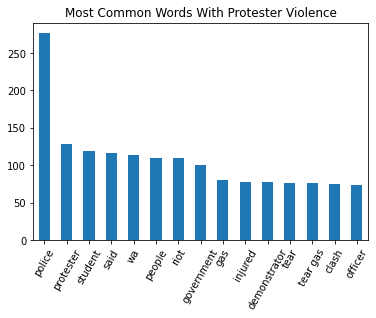

In [62]:
pv_note_count.sum().sort_values(ascending = False).head(15).plot(kind = 'bar')
plt.title('Most Common Words With Protester Violence')
plt.xticks(rotation = 60);

In [76]:
# student, riot, gas, injured, tear, tear gas, clash, officer

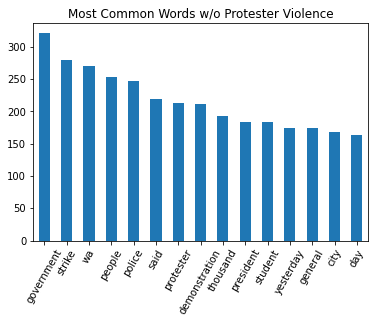

In [63]:
no_pv_note_count.sum().sort_values(ascending = False).head(15).plot(kind = 'bar')
plt.title('Most Common Words w/o Protester Violence')
plt.xticks(rotation = 60);

In [77]:
# strike, student(not as used), general, city

In [67]:
st_note_count = st[st.columns[-3000:3221]]

In [68]:
no_st_note_count = no_st[no_st.columns[-3000:3221]]

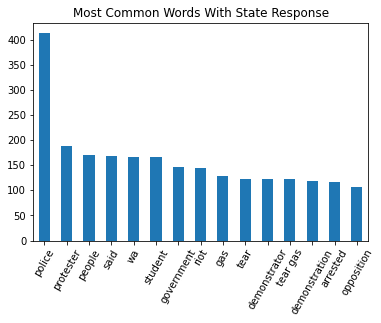

In [71]:
st_note_count.sum().sort_values(ascending = False).head(15).plot(kind = 'bar')
plt.title('Most Common Words With State Response')
plt.xticks(rotation = 60);

In [73]:
# police, student, NOT, gas, tear, tear gas, arrested, oppositon

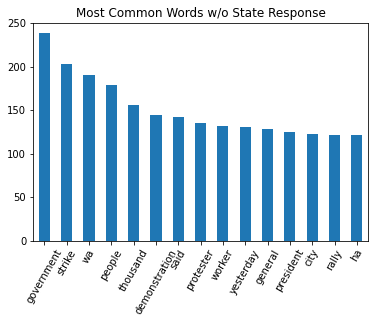

In [74]:
no_st_note_count.sum().sort_values(ascending = False).head(15).plot(kind = 'bar')
plt.title('Most Common Words w/o State Response')
plt.xticks(rotation = 60);

In [75]:
# strike, worker, president, city, rally, HA

### Taking Away Number Text Columns (46 columns)

In [84]:
note_count = df[df.columns[-2953:3221]]
pv_note_count = pv[pv.columns[-2953:3221]]
no_pv_note_count = no_pv[no_pv.columns[-2953:3221]]
st_note_count = st[st.columns[-2953:3221]]
no_st_note_count = no_st[no_st.columns[-2953:3221]]

In [82]:
pv_note_count.head()

800  abandoned  abdullah  ablaze  able  abortion  abuja  abuse  academic  \
3   0.0        0.0       0.0     0.0   0.0       0.0    0.0    0.0       0.0   
4   0.0        0.0       0.0     0.0   0.0       0.0    0.0    0.0       0.0   
8   0.0        0.0       0.0     0.0   0.0       0.0    0.0    0.0       0.0   
14  0.0        0.0       0.0     0.0   0.0       0.0    0.0    0.0       0.0   
18  0.0        0.0       0.0     0.0   0.0       0.0    0.0    0.0       0.0   

    accept  access  accident  accommodation  accord  according  \
3      0.0     0.0       0.0            0.0     0.0        0.0   
4      0.0     0.0       0.0            0.0     0.0        0.0   
8      0.0     0.0       0.0            0.0     0.0        0.0   
14     0.0     0.0       0.0            0.0     0.0        0.0   
18     0.0     0.0       0.0            0.0     0.0        0.0   

    according local  according police  account  accusation  accuse  accused  \
3               0.0               0.0      0.0         0.0     0.0      0.0   
4               0.0               0.0      0.0         0.0     0.0      0.0   
8               0.0               0.0      0.0         0.0     0.0      0.0   
14              0.0               0.0      0.0         0.0     0.0      0.0   
18              0.0               0.0      0.0         0.0     0.0      0.0   

    accusing  acronym  act  acting    action  activist  activity  actual  \
3        0.0      0.0  0.0     0.0  0.062616       0.0       0.0     0.0   
4        0.0      0.0  0.0     0.0  0.000000       0.0       0.0     0.0   
8        0.0      0.0  0.0     0.0  0.000000       0.0       0.0     0.0   
14       0.0      0.0  0.0     0.0  0.000000       0.0       0.0     0.0   
18       0.0      0.0  0.0     0.0  0.000000       0.0       0.0     0.0   

    actual number  added  adding  additional  address  addressed  addressing  \
3             0.0    0.0     0.0         0.0      0.0        0.0         0.0   
4             0.0    0.0     0.0         0.0      0.0        0.0         0.0   
8             0.0    0.0     0.0         0.0      0.0        0.0         0.0   
14            0.0    0.0     0.0         0.0      0.0        0.0         0.0   
18            0.0    0.0     0.0         0.0      0.0        0.0         0.0   

    administration  administrative  adopted   affair  affected  affiliated  \
3              0.0             0.0      0.0  0.18428       0.0         0.0   
4              0.0             0.0      0.0  0.00000       0.0         0.0   
8              0.0             0.0      0.0  0.00000       0.0         0.0   
14             0.0             0.0      0.0  0.00000       0.0         0.0   
18             0.0             0.0      0.0  0.00000       0.0         0.0   

    afp  afp correspondent  afp journalist  africa  african  african country  \
3   0.0                0.0             0.0     0.0      0.0              0.0   
4   0.0                0.0             0.0     0.0      0.0              0.0   
8   0.0                0.0             0.0     0.0      0.0              0.0   
14  0.0                0.0             0.0     0.0      0.0              0.0   
18  0.0                0.0             0.0     0.0      0.0              0.0   

    african nation  african national  afternoon  age  aged  agency  \
3              0.0               0.0        0.0  0.0   0.0     0.0   
4              0.0               0.0        0.0  0.0   0.0     0.0   
8              0.0               0.0        0.0  0.0   0.0     0.0   
14             0.0               0.0        0.0  0.0   0.0     0.0   
18             0.0               0.0        0.0  0.0   0.0     0.0   

    agency reported  agency said  agent  ago    agreed  agreement  \
3               0.0          0.0    0.0  0.0  0.084652        0.0   
4               0.0          0.0    0.0  0.0  0.000000        0.0   
8               0.0          0.0    0.0  0.0  0.000000        0.0   
14              0.0          0.0    0.0  0.0  0.000000        0.0 

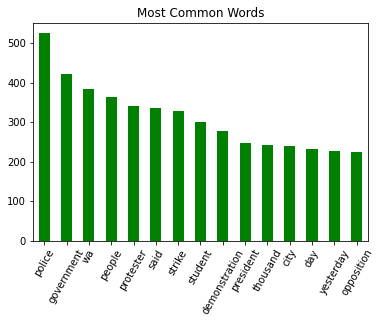

In [86]:
note_count.sum().sort_values(ascending = False).head(15).plot(kind = 'bar', color = 'green')
plt.title('Most Common Words')
plt.xticks(rotation = 60);

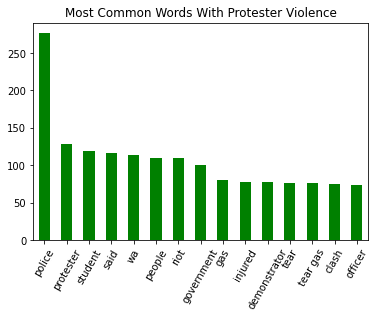

In [87]:
pv_note_count.sum().sort_values(ascending = False).head(15).plot(kind = 'bar', color = 'green')
plt.title('Most Common Words With Protester Violence')
plt.xticks(rotation = 60);

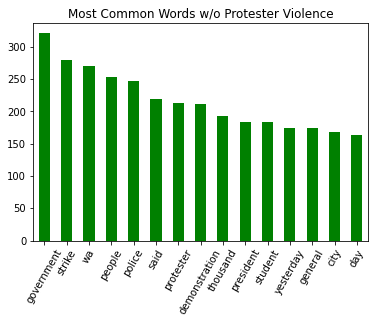

In [88]:
no_pv_note_count.sum().sort_values(ascending = False).head(15).plot(kind = 'bar', color = 'green')
plt.title('Most Common Words w/o Protester Violence')
plt.xticks(rotation = 60);

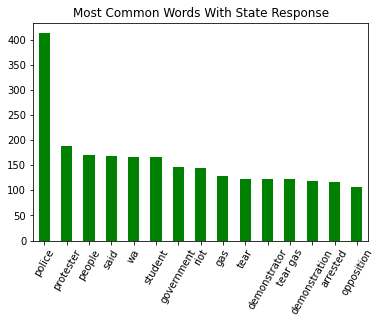

In [89]:
st_note_count.sum().sort_values(ascending = False).head(15).plot(kind = 'bar', color = 'green')
plt.title('Most Common Words With State Response')
plt.xticks(rotation = 60);

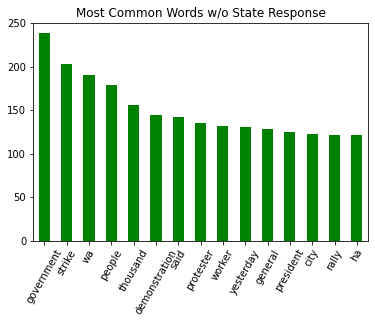

In [90]:
no_st_note_count.sum().sort_values(ascending = False).head(15).plot(kind = 'bar', color = 'green')
plt.title('Most Common Words w/o State Response')
plt.xticks(rotation = 60);

### Findings:
- Common Words: Government, protester, demonstration
- With Protester Violence:
        - student 
        - riot 
        - gas 
        - injured 
        - tear, 
        - tear gas
        - clash 
        - officer
    
    
- Without Protester Violence:
        - strike, 
        - student(not as used) 
        - general
        - city
    
    
- With State Response:
        - police 
        - student
        - NOT
        - gas 
        - tear 
        - tear gas
        - arrested
        - oppositon
    
    
- Without State Response:
        - strike
        - worker
        - president
        - city
        - rally
        - HA

# Participants

In [91]:
pv['participants'].mean()

14505.35838150289

In [92]:
no_pv['participants'].mean()

22138.140701162356

In [93]:
st['participants'].mean()

15043.496538594669

In [95]:
no_st['participants'].mean()

23399.889770952628

In [164]:
data = [['Participant Violence', 14505.35838150289], ['No Participant Violence', 22138.140701162356], 
        ['State Response', 15043.496538594669], ['No State Response', 23399.889770952628]]

In [165]:
participants = pd.DataFrame(data, columns = ['Type of Action', 'Average Participants']) 

In [166]:
participants.head()

,Type of Action,Average Participants
0,Participant Violence,14505.358382
1,No Participant Violence,22138.140701
2,State Response,15043.496539
3,No State Response,23399.889771


Text(0, 0.5, 'Average Participants')

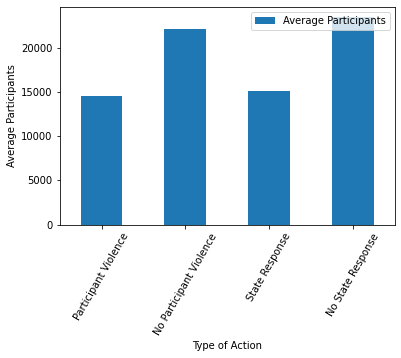

In [115]:
participants.plot(kind = 'bar')
plt.xticks(rotation = 60)
plt.ylabel('Average Participants')

## Reason For Protest

labor wage dispute	
land farm issue	
police brutality	
political behavior, process	
price increases, tax policy	
removal of politician	
social restrictions

In [117]:
lwg = df[df['labor wage dispute'] == 1]
land_farm = df[df['land farm issue'] == 1]
police = df[df['police brutality'] == 1]
politics = df[df['political behavior, process'] == 1]
tax = df[df['price increases, tax policy'] == 1]
removal = df[df['removal of politician'] == 1]
social = df[df['social restrictions'] == 1]

In [183]:
def dataframes(df):
    return df['stateresponse'].value_counts(normalize = True).plot(kind = 'bar')

In [193]:
def dataframe(df):
    return df['protesterviolence'].value_counts(normalize = True).plot(kind = 'bar')

In [198]:
def numbers(df):
    return df['stateresponse'].value_counts(normalize = True), df['protesterviolence'].value_counts(normalize = True)

In [207]:
def participants(df):
    return df['participants'].mean()

In [208]:
participants(lwg), participants(land_farm), participants(police), participants(politics), participants(tax), participants(removal), participants(social)

(36742.06928838951,
 3171.766903914591,
 8975.911646586346,
 21917.49995085995,
 22136.08181154127,
 25464.583229813663,
 19927.204472843452)

In [199]:
numbers(lwg), numbers(land_farm), numbers(police), numbers(politics), numbers(tax), numbers(removal), numbers(social)

((ignore             0.573970
  crowd dispersal    0.167603
  accomodation       0.111891
  arrests            0.078184
  beatings           0.027622
  killings           0.021067
  shootings          0.019663
  Name: stateresponse, dtype: float64,
  0.0    0.771536
  1.0    0.228464
  Name: protesterviolence, dtype: float64),
 (ignore             0.478648
  crowd dispersal    0.186833
  accomodation       0.110320
  arrests            0.104982
  killings           0.051601
  beatings           0.033808
  shootings          0.033808
  Name: stateresponse, dtype: float64,
  0.0    0.711744
  1.0    0.288256
  Name: protesterviolence, dtype: float64),
 (ignore             0.367470
  crowd dispersal    0.205823
  arrests            0.140562
  killings           0.091365
  beatings           0.075301
  shootings          0.061245
  accomodation       0.058233
  Name: stateresponse, dtype: float64,
  0.0    0.584337
  1.0    0.415663
  Name: protesterviolence, dtype: float64),
 (ignore     

In [209]:
# Ignore, Crowd Dispersal, Accomodation, Arrests, , Beatings, Killings, Shootings, No Violence, PV
issue = [['Labor Wage', 0.573970, 0.167603, 0.111891, 0.078184, 0.027622, 0.021067, 0.019663, 0.740835, 0.228464, 36742.069],
        ['Land/Farm', 0.478648, 0.186833, 0.110320, 0.104982, 0.033808, 0.051601, 0.033808, 0.711744, 0.288256, 3171.767],
        ['Police Brutality', 0.367470, 0.205823, 0.058233, 0.140562, 0.075301, 0.091365, 0.061245, 0.584337, 0.415663, 8975.913],
        ['Politics', 0.538378, 0.179656, 0.053071, 0.104177, 0.043342, 0.055921, 0.025455, 0.740835, 0.259165, 21917.500],
        ['Tax Policy', 0.482104, 0.182615, 0.089116, 0.133674, 0.023375, 0.052593, 0.036523, 0.673484, 0.326516, 22136.082],
        ['Removal of Politician', 0.483230, 0.194410, 0.084472, 0.078882, 0.042236, 0.081366, 0.035404, 0.730435, 0.269565, 25464.583],
        ['Social Restrictions', 0.643770, 0.121406, 0.073482, 0.086262, 0.033546, 0.030351, 0.011182, 0.84984, 0.15016, 19927.204]]

In [210]:
issues = pd.DataFrame(issue, columns = ['Reason for Protest', 'Ignore', 'Crowd Dispersal', 'Accomodation',
                                       'Arrests', 'Beatings', 'Killings', 'Shootings', 'No PV', 'Protester Violence',
                                       'Average Participants']) 

In [211]:
issues.sort_values('No PV')

,Reason for Protest,Ignore,Crowd Dispersal,Accomodation,Arrests,Beatings,Killings,Shootings,No PV,Protester Violence,Average Participants
2,Police Brutality,0.367470,0.205823,0.058233,0.140562,0.075301,0.091365,0.061245,0.584337,0.415663,8975.913
4,Tax Policy,0.482104,0.182615,0.089116,0.133674,0.023375,0.052593,0.036523,0.673484,0.326516,22136.082
1,Land/Farm,0.478648,0.186833,0.110320,0.104982,0.033808,0.051601,0.033808,0.711744,0.288256,3171.767
5,Removal of Politician,0.483230,0.194410,0.084472,0.078882,0.042236,0.081366,0.035404,0.730435,0.269565,25464.583
0,Labor Wage,0.573970,0.167603,0.111891,0.078184,0.027622,0.021067,0.019663,0.740835,0.228464,36742.069
3,Politics,0.538378,0.179656,0.053071,0.104177,0.043342,0.055921,0.025455,0.740835,0.259165,21917.500
6,Social Restrictions,0.643770,0.121406,0.073482,0.086262,0.033546,0.030351,0.011182,0.849840,0.150160,19927.204


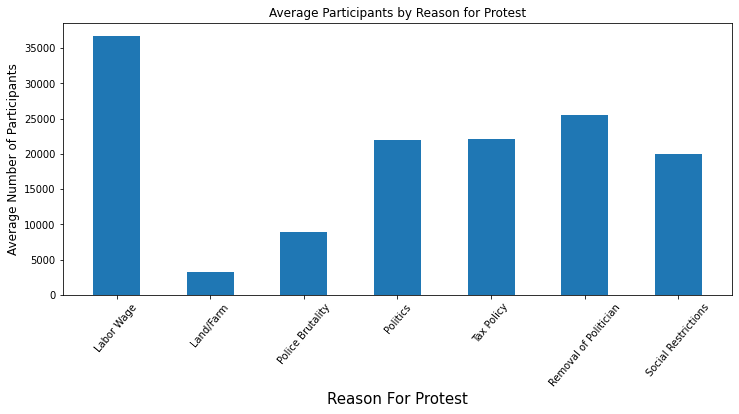

In [227]:
plt.figure(figsize=(12,5))
plt.bar(issues['Reason for Protest'], issues['Protester Violence'], width = .5, color='orangered')
plt.xticks(rotation = 50)
plt.title('Protess Reasons, and their ')
plt.xlabel('Reason For Protest', fontsize=12)
plt.ylabel('Average Number of Participants', fontsize = 12);

In [ ]:
plt.figure(figsize=(12,5))
plt.bar(issues['Reason for Protest'], issues['Average Participants'], width = .5)
plt.xticks(rotation = 50)
plt.title('Average Participants by Reason for Protest')
plt.xlabel('Reason For Protest', fontsize=15)
plt.ylabel('Average Number of Participants', fontsize = 12);